# HR Analytics Project- Understanding the Attrition in HR
### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [78]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [32]:
df = pd.read_csv('HREmployeeAttrition.csv')

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [34]:
pd.set_option('display.max_columns', 100)

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Cleaning and Preprocessing

In [36]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### No missing values

In [37]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [39]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [40]:
#Checking the categorical features
df.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [41]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [42]:
# let's encode the attrition column so we can use it for EDA
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


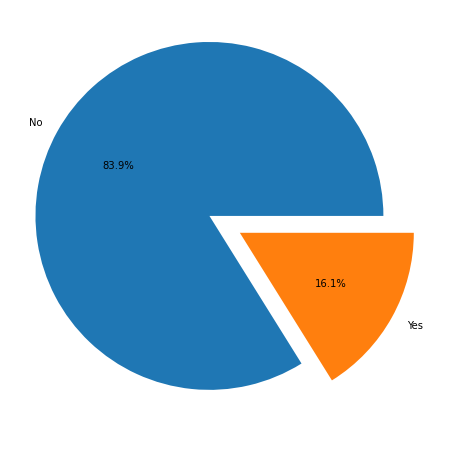

In [43]:
plt.figure(figsize=(8,8))
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [44]:
# Numeric Columns in dataset
df.select_dtypes(include=['int64']).dtypes

Age                         int64
Attrition                   int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

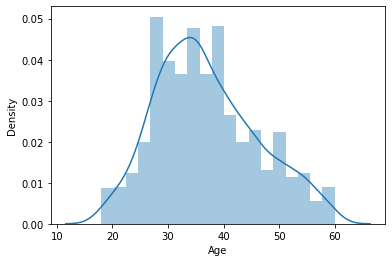

In [45]:
sns.distplot(df["Age"])
plt.show()

In [46]:
df[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [47]:
df[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

In [48]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [49]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

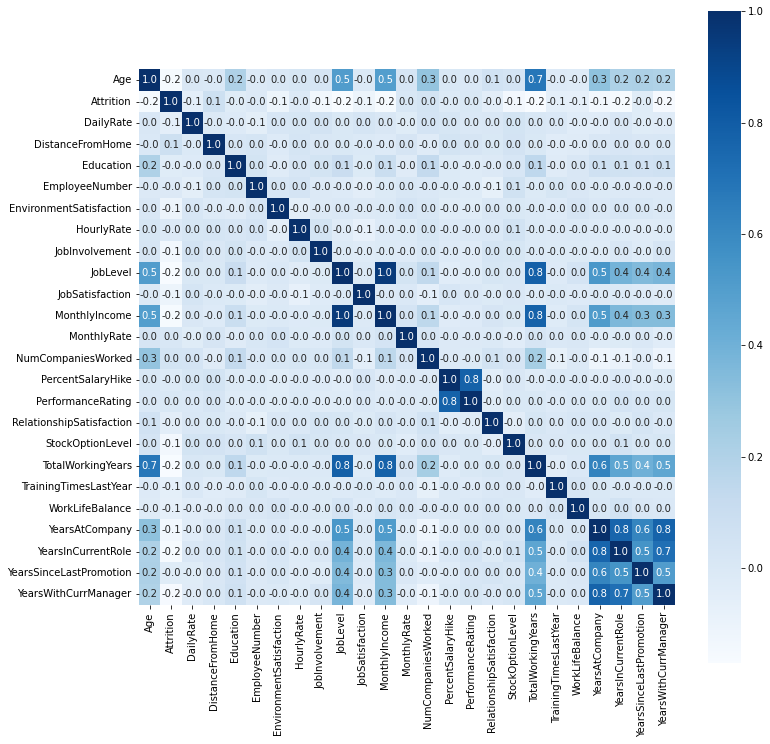

In [50]:
# We can use a heatmap to check correlation between the variables.
df = df.drop(['EmployeeCount','StandardHours'], axis=1)
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')
plt.show

1. There isn't a very strong correlation of the target column with any of the numerical columns. 
2. More senior employees have higher total working years (very obvious)
3. Higher performance ratings lead to salary hike percentage to increase
4. The more years an employee puts in, the more their monthly income increases
5. A lot of employees remain in their current role and also under the same manager as years pass by meaning they don't get promotion and this could be a major factor contributing to attrition

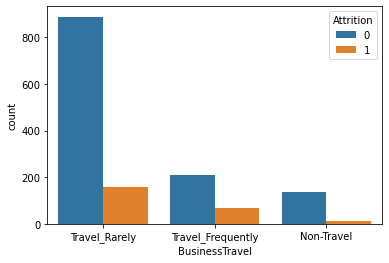

In [51]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df);

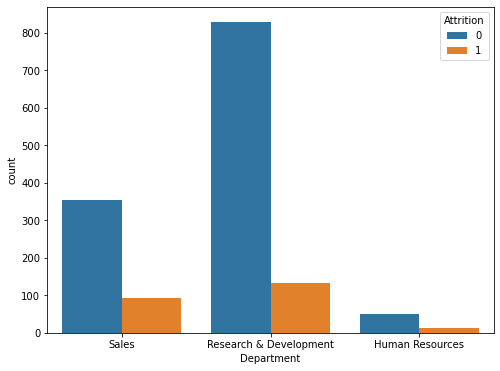

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=df);

In [53]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

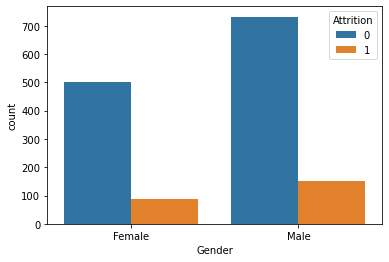

In [54]:
sns.countplot(x='Gender', hue='Attrition', data=df);

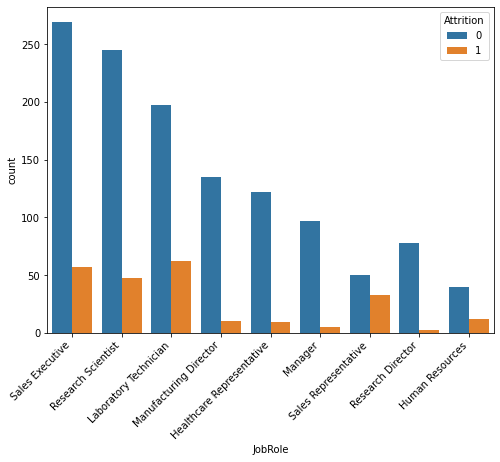

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=df);
plt.xticks(rotation=45,ha = 'right')
plt.show()

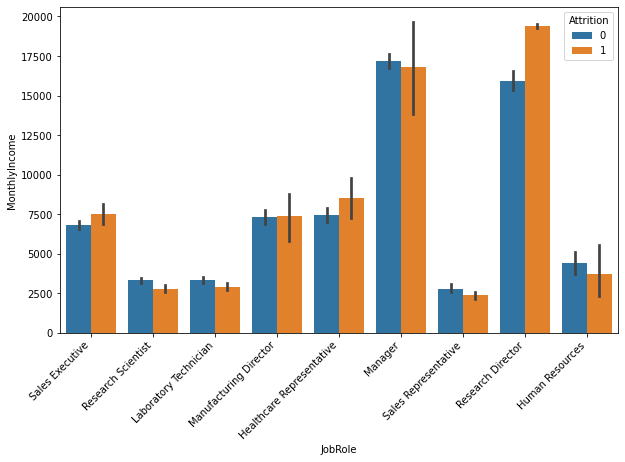

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df)
plt.xticks(rotation=45,ha ='right')
plt.show()

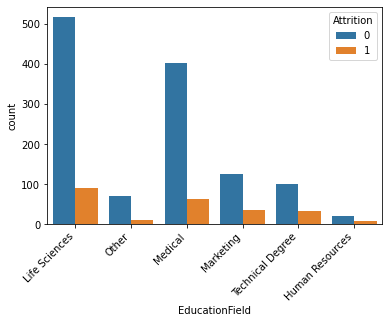

In [61]:
sns.countplot(x='EducationField', hue='Attrition', data=df);
plt.xticks(rotation=45,ha ='right')
plt.show()

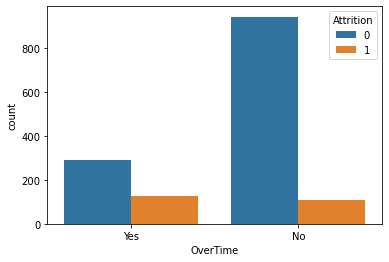

In [62]:
sns.countplot(x='OverTime', hue='Attrition', data=df);

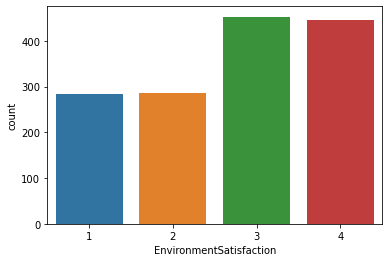

In [63]:
sns.countplot(x='EnvironmentSatisfaction', data=df);

# Splitting Data into X and y

In [65]:
X = df.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1)
y = df['Attrition'] 

In [66]:
X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

In [67]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [68]:
# Finding the best random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.8197278911564626  on Random_state  146


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.9013605442176871  on Random_state  26


In [70]:
## Creating Train Test Split again with new random state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = fin_rs)

In [73]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [74]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
log_reg_pred=lr.predict(X_test)
print("Accuracy of the model with Logistic Regressio is: ",accuracy_score(y_test, log_reg_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, log_reg_pred))

Accuracy of the model with Logistic Regressio is:  89.1156462585034 % 

Confusion matrix is: 
 [[254   7]
 [ 25   8]]


In [75]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print("Accuracy of the model with Decision tree Classifier is: ",accuracy_score(y_test, dtc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, dtc_pred))

Accuracy of the model with Decision tree Classifier is:  79.59183673469387 % 

Confusion matrix is: 
 [[217  44]
 [ 16  17]]


In [76]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy of the model with Random Forest Classifier is: ",accuracy_score(y_test, rfc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, rfc_pred))

Accuracy of the model with Random Forest Classifier is:  89.45578231292517 % 

Confusion matrix is: 
 [[255   6]
 [ 25   8]]


In [79]:
knn = KNN()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("Accuracy of the model with KNN Classifier is: ",accuracy_score(y_test, knn_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, knn_pred))

Accuracy of the model with KNN Classifier is:  89.1156462585034 % 

Confusion matrix is: 
 [[258   3]
 [ 29   4]]


In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
# Cross Validation score for Random Forest Classifier 
print('The accuracy of the Random Forest Classifier with a cross validation of 10 is:',cross_val_score(rfc,X,y,cv=10).mean())

The accuracy of the Random Forest Classifier with a cross validation of 10 is: 0.845578231292517


In [83]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [84]:
params = {'max_depth': [2,3,4,5,6],'criterion' :['gini', 'entropy', 'log_loss'],'n_estimators': [50,100,200,300,400,500,600]}

In [85]:
rfcgscv = GridSearchCV(estimator = rfc, cv=10,param_grid = params, n_jobs = -1, verbose = 2, return_train_score=True)
rfcgscv.fit(X_train, y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600]},
             return_train_score=True, verbose=2)

In [86]:
rfcgscv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}

In [87]:
attr = RandomForestClassifier(criterion='entropy',max_depth=6, n_estimators=50)
attr.fit(X_train, y_train)
pred = attr.predict(X_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is : ',acc*100)

Accuracy is :  90.1360544217687
